In [50]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel('/content/heart_disease.xlsx' ,sheet_name ='Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
# Summary statistics
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,386,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [9]:
# Count missing values (replace '?' with NaN first if needed)
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


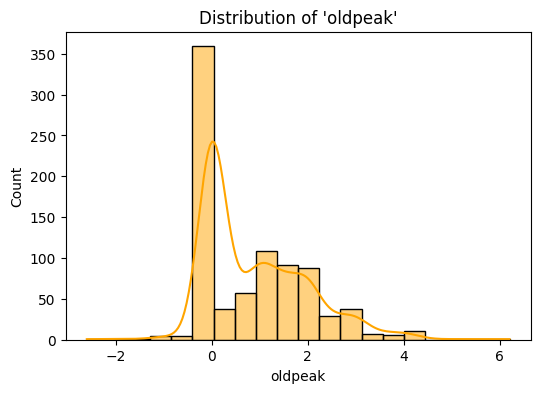

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data['oldpeak'], kde=True, bins=20, color='orange')
plt.title("Distribution of 'oldpeak'")
plt.xlabel("oldpeak")
plt.ylabel("Count")
plt.show()

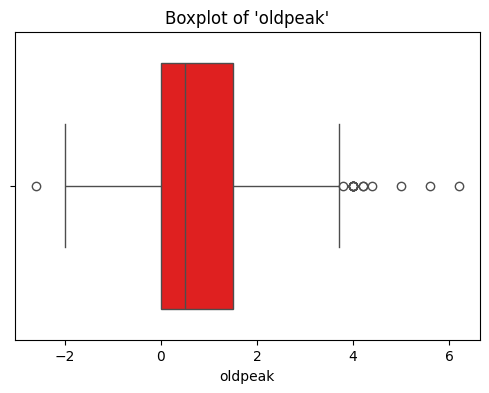

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['oldpeak'], color='red')
plt.title("Boxplot of 'oldpeak'")
plt.show()

In [16]:
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

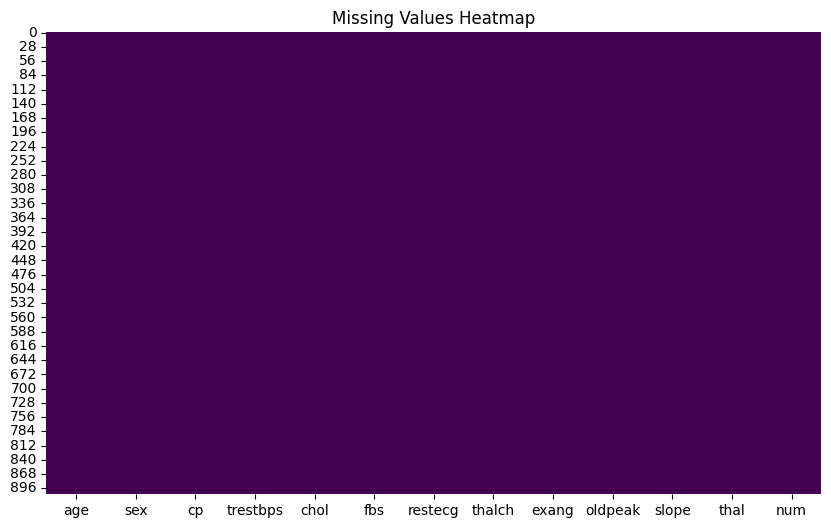

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show() # no missing data

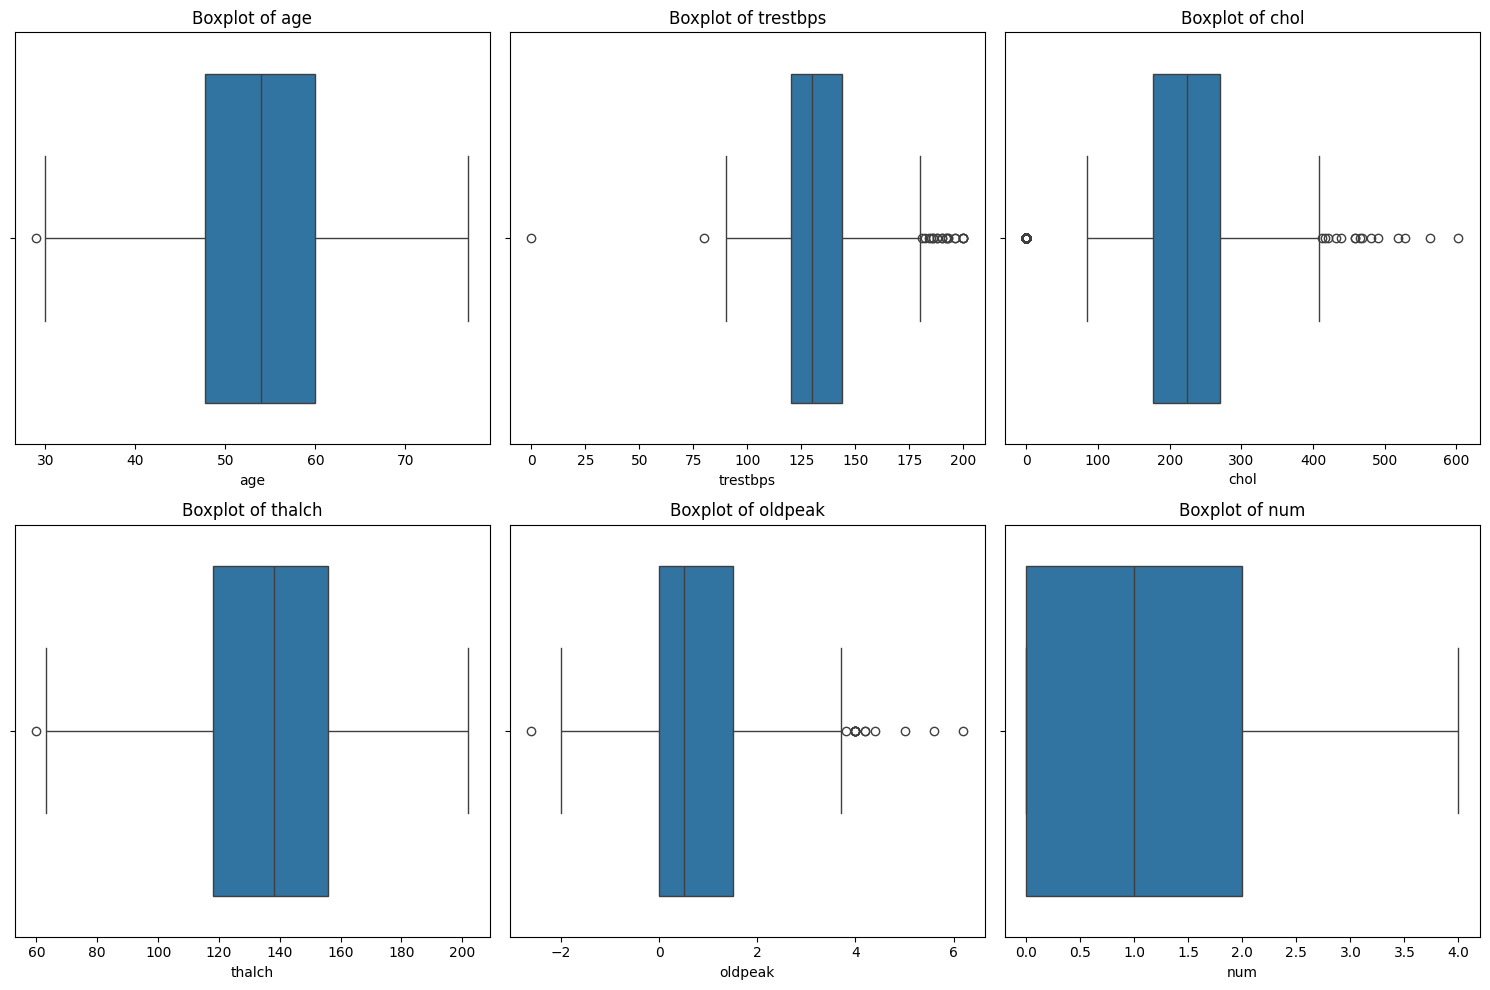

In [18]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [32]:
# Step 1: Save the original number of rows
original_shape = data.shape

# Step 2: Apply the outlier removal (repeating here for context)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Step 3: Remove outliers for selected columns
cols_with_outliers = ['trestbps', 'chol', 'oldpeak', 'thalch']
for col in cols_with_outliers:
    data = remove_outliers_iqr(data, col)

# Step 4: Save the new shape
new_shape = data.shape

# Step 5: Print the difference
print(f"Original rows: {original_shape[0]}")
print(f"Rows after outlier removal: {new_shape[0]}")
print(f"Rows removed: {original_shape[0] - new_shape[0]}")


Original rows: 692
Rows after outlier removal: 669
Rows removed: 23


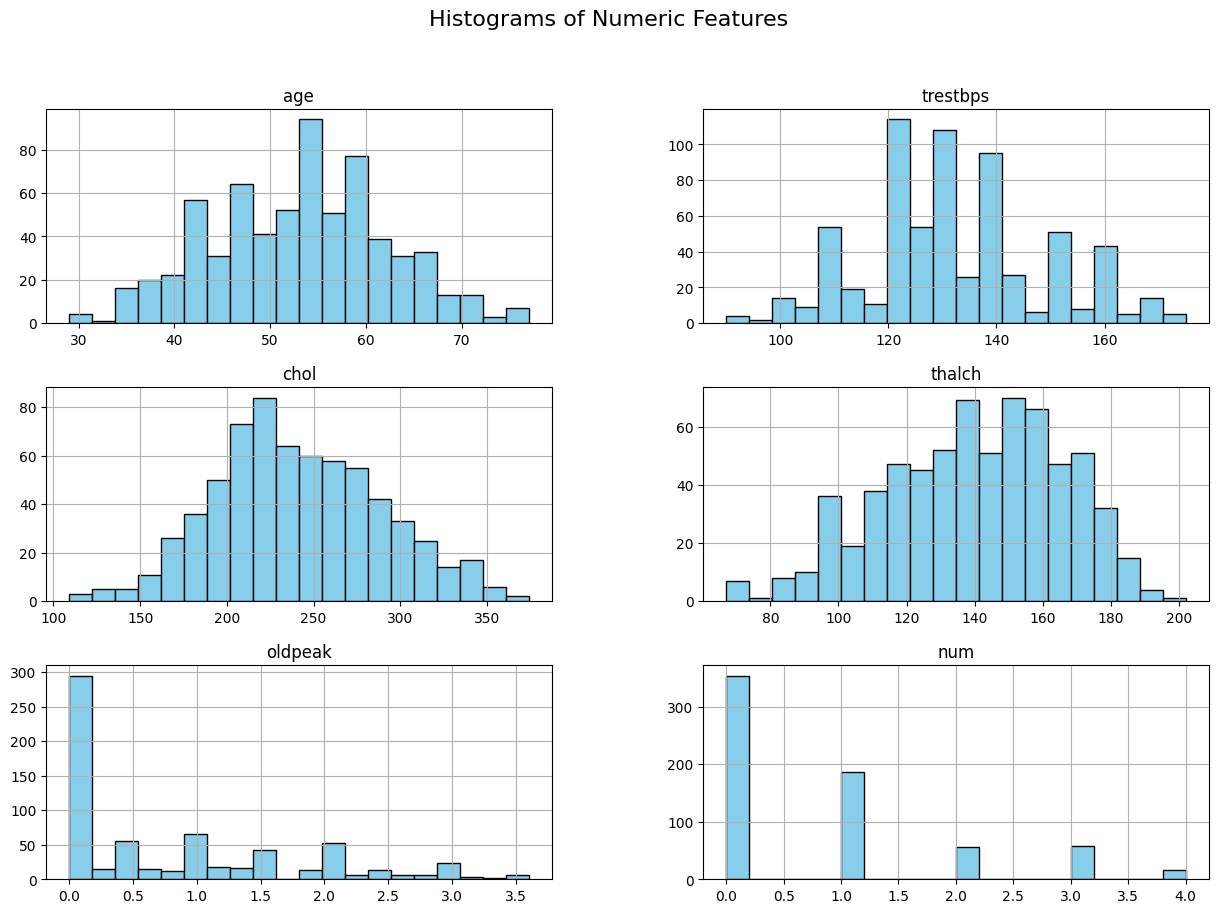

In [33]:
# Histograms for all numeric features
data[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

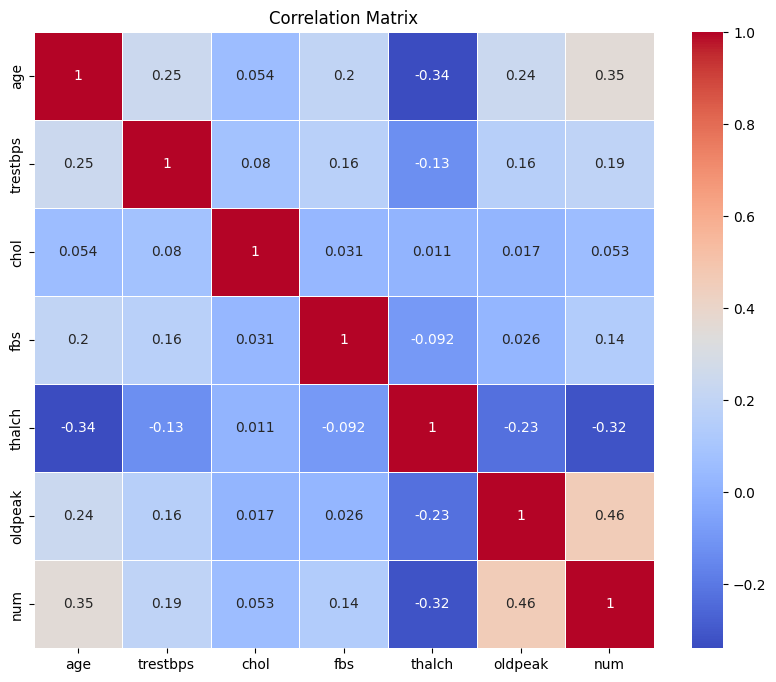

In [34]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [35]:
# Option 1: Fill with median
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)

In [38]:
# Identify types within each column
for col in categorical_cols:
    print(f"{col} unique types: {set([type(val) for val in data[col]])}")


sex unique types: {<class 'int'>}
cp unique types: {<class 'int'>}
fbs unique types: {<class 'int'>}
restecg unique types: {<class 'int'>}
exang unique types: {<class 'bool'>, <class 'str'>}
slope unique types: {<class 'str'>}
thal unique types: {<class 'str'>}


In [39]:
for col in categorical_cols:
    data[col] = data[col].astype(str)  # Convert all values to string
    data[col] = le.fit_transform(data[col])


In [40]:
# Convert boolean columns to integers if they're meant to be
data['fbs'] = data['fbs'].astype(int)  # True -> 1, False -> 0

In [41]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [43]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [45]:
X = data.drop('num', axis=1)      # Features
y = data['num']                   # Target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create and train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73        80
           1       0.20      0.28      0.23        25
           2       0.09      0.11      0.10         9
           3       0.27      0.20      0.23        15
           4       0.00      0.00      0.00         5

    accuracy                           0.50       134
   macro avg       0.26      0.26      0.26       134
weighted avg       0.53      0.50      0.51       134

Confusion Matrix:
 [[56 21  3  0  0]
 [ 9  7  3  4  2]
 [ 3  2  1  3  0]
 [ 5  4  2  3  1]
 [ 1  1  2  1  0]]


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Re-evaluate with best model
y_best_pred = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_best_pred))
print("Tuned Classification Report:\n", classification_report(y_test, y_best_pred))


Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Tuned Accuracy: 0.6716417910447762
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        80
           1       0.41      0.68      0.52        25
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         5

    accuracy                           0.67       134
   macro avg       0.24      0.32      0.27       134
weighted avg       0.55      0.67      0.60       134



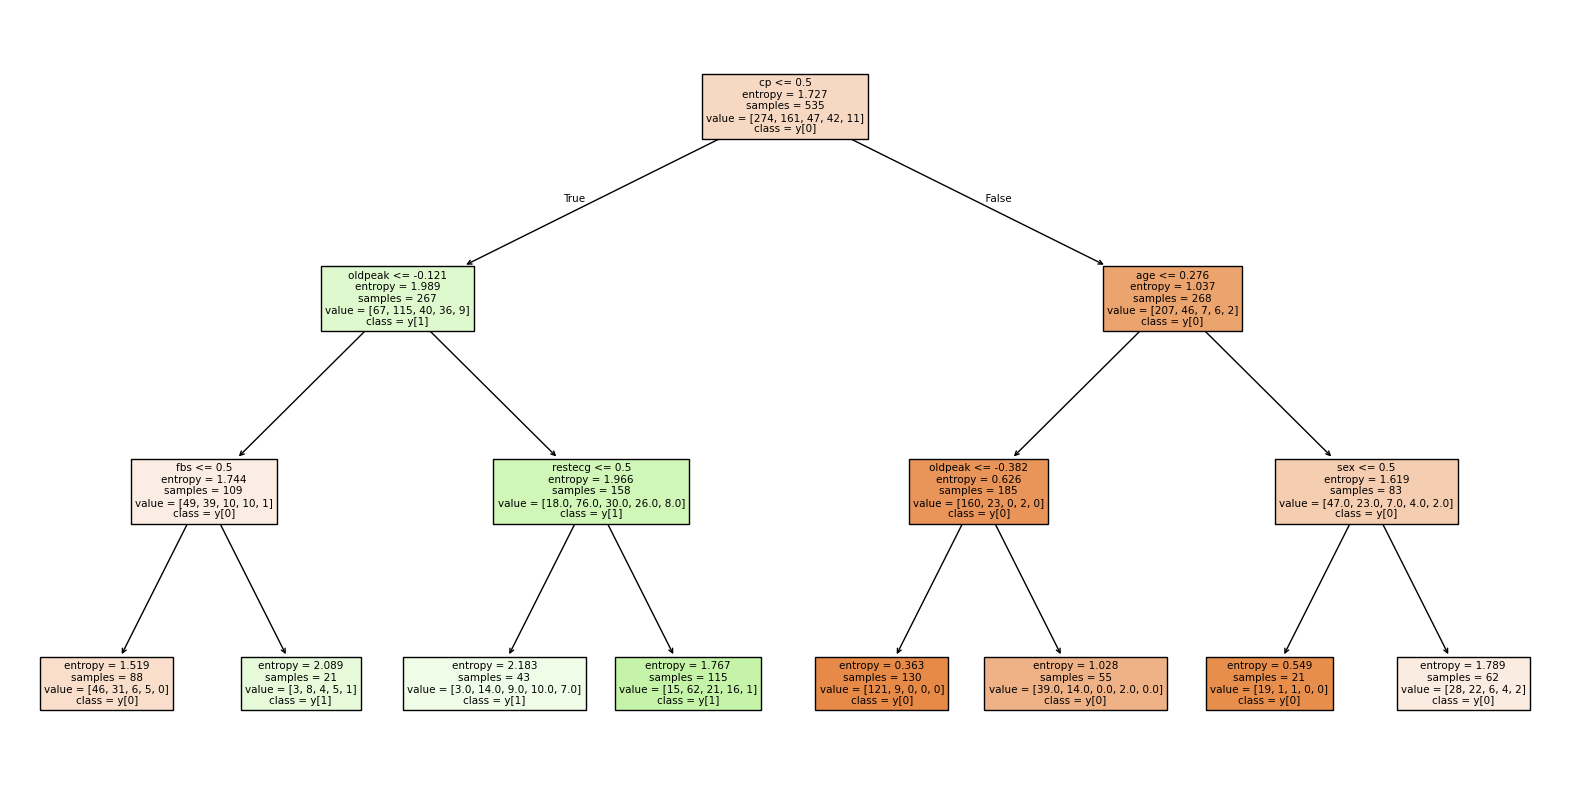

In [51]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

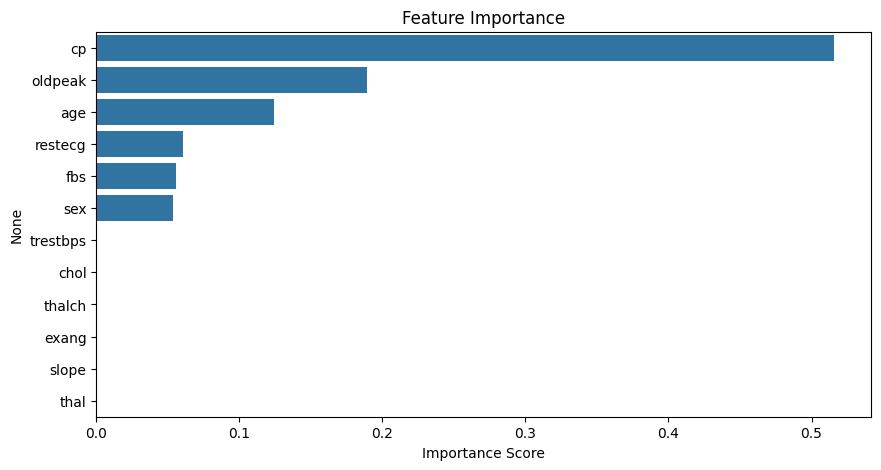

In [52]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision tree models have several important hyperparameters that can significantly impact their performance:

max_depth: This sets the maximum depth of the tree. A deeper tree can learn more complex patterns but may also overfit the training data. Limiting the depth helps improve generalization.

min_samples_split: This defines the minimum number of samples required to split an internal node. Higher values prevent the model from creating very specific splits that may not generalize well.

min_samples_leaf: It sets the minimum number of samples a leaf node must have. Increasing this value can lead to a more generalized model by avoiding small, overly specific leaf nodes.

criterion: This decides the function used to measure the quality of a split. Common options include "gini" for Gini impurity and "entropy" for information gain. The choice may slightly affect model performance, but both generally work well.

Tuning these hyperparameters allows us to balance between underfitting (too simple) and overfitting (too complex) and build a model that performs well on both training and testing data.

2. What is the difference between Label Encoding and One-Hot Encoding?

Both Label Encoding and One-Hot Encoding are techniques used to convert categorical variables into a numerical format so that machine learning models can work with them. However, they work in different ways:

Label Encoding assigns each unique category a numerical value (e.g., "male" = 0, "female" = 1). This is simple and memory-efficient but can be problematic for models that might interpret these numbers as having an order or priority — which isn’t true in most categorical data.

One-Hot Encoding, on the other hand, creates a new binary column for each category (e.g., "male" = [1, 0], "female" = [0, 1]). It avoids the risk of implying any sort of ranking but can increase the size of the dataset significantly, especially if the feature has many unique categories.

In short:

Use Label Encoding when the categorical variable has a natural order.

Use One-Hot Encoding when the variable is nominal (no order) and has fewer unique categories.